In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(13)

from keras.models import Sequential
from keras.datasets import imdb
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.utils import np_utils
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
max_features = 2000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
maxlen = 10
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
epochs = 10

In [3]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=100, input_length=maxlen))
model.add(GRU(20, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

res_gru_1 = model.fit(x_train, y_train, batch_size=256, epochs=epochs, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 2s - loss: 0.6910 - acc: 0.5468 - val_loss: 0.6890 - val_acc: 0.5648
Epoch 2/10
25000/25000 [==============================] - 2s - loss: 0.6836 - acc: 0.5828 - val_loss: 0.6765 - val_acc: 0.5895
Epoch 3/10
25000/25000 [==============================] - 2s - loss: 0.6448 - acc: 0.6273 - val_loss: 0.6045 - val_acc: 0.6587
Epoch 4/10
25000/25000 [==============================] - 1s - loss: 0.5746 - acc: 0.6911 - val_loss: 0.5653 - val_acc: 0.6957
Epoch 5/10
25000/25000 [==============================] - 1s - loss: 0.5476 - acc: 0.7114 - val_loss: 0.5565 - val_acc: 0.7034
Epoch 6/10
25000/25000 [==============================] - 1s - loss: 0.5324 - acc: 0.7267 - val_loss: 0.5593 - val_acc: 0.6998
Epoch 7/10
25000/25000 [==============================] - 1s - loss: 0.5225 - acc: 0.7314 - val_loss: 0.5478 - val_acc: 0.7112
Epoch 8/10
25000/25000 [==============================] - 2s 

In [4]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=100, input_length=maxlen))
model.add(GRU(20, return_sequences=True))
model.add(GRU(20, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

res_gru_2 = model.fit(x_train, y_train, batch_size=256, epochs=epochs, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 4s - loss: 0.6907 - acc: 0.5566 - val_loss: 0.6859 - val_acc: 0.5833
Epoch 2/10
25000/25000 [==============================] - 4s - loss: 0.6502 - acc: 0.6242 - val_loss: 0.6388 - val_acc: 0.6268
Epoch 3/10
25000/25000 [==============================] - 4s - loss: 0.5825 - acc: 0.6831 - val_loss: 0.5877 - val_acc: 0.6754
Epoch 4/10
25000/25000 [==============================] - 4s - loss: 0.5545 - acc: 0.7066 - val_loss: 0.5671 - val_acc: 0.6921
Epoch 5/10
25000/25000 [==============================] - 4s - loss: 0.5400 - acc: 0.7219 - val_loss: 0.5553 - val_acc: 0.7027
Epoch 6/10
25000/25000 [==============================] - 4s - loss: 0.5268 - acc: 0.7316 - val_loss: 0.5535 - val_acc: 0.7061
Epoch 7/10
25000/25000 [==============================] - 4s - loss: 0.5219 - acc: 0.7319 - val_loss: 0.5507 - val_acc: 0.7099
Epoch 8/10
25000/25000 [==============================] - 3s 

In [5]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=100, input_length=maxlen))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

res_lstm_1 = model.fit(x_train, y_train, batch_size=256, epochs=epochs,
                    validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 2s - loss: 0.6907 - acc: 0.5600 - val_loss: 0.6866 - val_acc: 0.6032
Epoch 2/10
25000/25000 [==============================] - 2s - loss: 0.6667 - acc: 0.6222 - val_loss: 0.6346 - val_acc: 0.6355
Epoch 3/10
25000/25000 [==============================] - 2s - loss: 0.5997 - acc: 0.6752 - val_loss: 0.5800 - val_acc: 0.6884
Epoch 4/10
25000/25000 [==============================] - 2s - loss: 0.5597 - acc: 0.7080 - val_loss: 0.5627 - val_acc: 0.6976
Epoch 5/10
25000/25000 [==============================] - 2s - loss: 0.5392 - acc: 0.7223 - val_loss: 0.5513 - val_acc: 0.7083
Epoch 6/10
25000/25000 [==============================] - 2s - loss: 0.5277 - acc: 0.7326 - val_loss: 0.5481 - val_acc: 0.7114
Epoch 7/10
25000/25000 [==============================] - 2s - loss: 0.5187 - acc: 0.7363 - val_loss: 0.5490 - val_acc: 0.7124
Epoch 8/10
25000/25000 [==============================] - 2s 

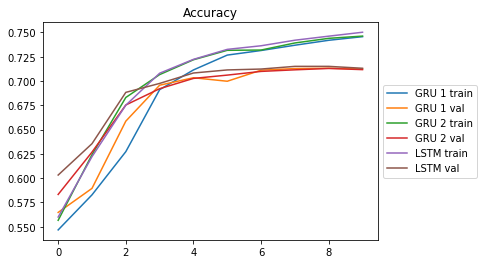

In [6]:
x = range(epochs)
plt.plot(x, res_gru_1.history['acc'], label='GRU 1 train')
plt.plot(x, res_gru_1.history['val_acc'], label='GRU 1 val')
plt.plot(x, res_gru_2.history['acc'], label='GRU 2 train')
plt.plot(x, res_gru_2.history['val_acc'], label='GRU 2 val')
plt.plot(x, res_lstm_1.history['acc'], label='LSTM train')
plt.plot(x, res_lstm_1.history['val_acc'], label='LSTM val')
plt.title('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

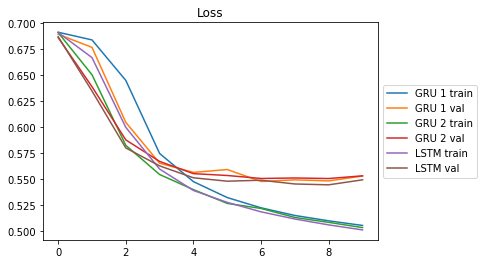

In [7]:
plt.plot(x, res_gru_1.history['loss'], label='GRU 1 train')
plt.plot(x, res_gru_1.history['val_loss'], label='GRU 1 val')
plt.plot(x, res_gru_2.history['loss'], label='GRU 2 train')
plt.plot(x, res_gru_2.history['val_loss'], label='GRU 2 val')
plt.plot(x, res_lstm_1.history['loss'], label='LSTM train')
plt.plot(x, res_lstm_1.history['val_loss'], label='LSTM val')
plt.title('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()